In [598]:
# Import the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

###  I - Utility class
1. Function to load the dataset
2. Function to check for not a numbers
3. Function to collect column names

In [599]:
# Utility class
class Utils:
    def __init__(self):
        pass
       
    # Function to load the dataset
    def load_dataset(self, dataset_name):
        self.dataset = pd.read_csv(dataset_name)
    
    def check_for_nans(self):
        # let's confirm if there are any nulls -- there should not be any NaNs since the column is not-null
        feature_names = self.dataset.columns
        values = self.dataset.isnull().sum()
        nans = []
        for feature, val in zip(feature_names, values):
            if val!=0:
                nans.append(feature)
        print(nans) if nans else print('No NaN')
        
    def display_column_names(self):
        print(self.dataset.columns)

In [600]:
def load_inspect_data(data):
    u = Utils()
    u.load_dataset(data)
    print("Checking for NaN")
    u.check_for_nans()
    u.display_column_names()
    return u.dataset

In [601]:
print("Load training data")
house_train=load_inspect_data('PA1_train.csv')
print("No of features in the training set: ", len(house_train))

print("Load testing data")
house_val=load_inspect_data('PA1_dev.csv')
print("No of features in the validation set: ", len(house_val))

Load training data
Checking for NaN
No NaN
Index(['dummy', 'id', 'date', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')
Load testing data
Checking for NaN
No NaN
Index(['dummy', 'id', 'date', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')


In [602]:
# dummy column is provided for the intercept
# display the data information
house_train.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
dummy            10000 non-null int64
id               10000 non-null int64
date             10000 non-null object
bedrooms         10000 non-null int64
bathrooms        10000 non-null float64
sqft_living      10000 non-null int64
sqft_lot         10000 non-null int64
floors           10000 non-null float64
waterfront       10000 non-null int64
view             10000 non-null int64
condition        10000 non-null int64
grade            10000 non-null int64
sqft_above       10000 non-null int64
sqft_basement    10000 non-null int64
yr_built         10000 non-null int64
yr_renovated     10000 non-null int64
zipcode          10000 non-null int64
lat              10000 non-null float64
long             10000 non-null float64
sqft_living15    10000 non-null int64
sqft_lot15       10000 non-null int64
price            10000 non-null float64
dtypes: float64(5), int64(16), object(1)
memo

In [603]:
house_train.head(5)

,dummy,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,1,3066410850,7/9/2014,4,2.50,2720,10006,2.0,0,0,...,2720,0,1989,0,98074,47.6295,-122.042,2720,10759,5.9495
1,1,9345400350,7/18/2014,2,2.50,2600,5000,1.0,0,0,...,1300,1300,1926,0,98126,47.5806,-122.379,2260,5000,6.6500
2,1,7128300060,7/7/2014,5,1.75,1650,3000,1.5,0,0,...,1650,0,1902,0,98144,47.5955,-122.306,1740,4000,4.4300
3,1,2155500030,4/28/2015,4,1.75,1720,9600,1.0,0,0,...,1720,0,1969,0,98059,47.4764,-122.155,1660,10720,3.8000
4,1,3999300080,9/4/2014,6,2.25,3830,11180,1.0,0,2,...,2440,1390,1962,0,98008,47.5849,-122.113,2500,10400,8.8700


In [604]:
house_val.tail(5)

,dummy,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
5592,1,7430200100,5/14/2014,4,3.50,4910,9444,1.5,0,0,...,3110,1800,2007,0,98074,47.6502,-122.066,4560,11063,12.20000
5593,1,8956200760,10/13/2014,4,2.50,3118,7866,2.0,0,2,...,3118,0,2014,0,98001,47.2931,-122.264,2673,6500,5.41800
5594,1,3448900210,10/14/2014,4,2.50,2520,6023,2.0,0,0,...,2520,0,2014,0,98056,47.5137,-122.167,2520,6023,6.10685
5595,1,2997800021,2/19/2015,3,2.50,1310,1294,2.0,0,0,...,1180,130,2008,0,98116,47.5773,-122.409,1330,1265,4.75000
5596,1,1523300141,6/23/2014,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,4.02101


### II - Data cleaning
Steps performed in data cleaning-
1. Drop the id feature. Keeping the id feature is a bad idea. (may overfit the data)
2. Convert date into datatime and Split the date into day, month and year
3. Function to convert a feature into log feature.

We convert the date feature to log date. The reason will be clear in the below section - visualization

In [605]:
class Preprocess:
    def __init__(self, dataset):
        self.dataset = dataset
    
    # drop the id feature
    
    def drop_feature(self, feature):
        del self.dataset[feature] # house_train.drop('id', axis=1)
    
    # convert string date to datetime data type
    def convert_datetime(self, feature):
        self.dataset[feature] = pd.to_datetime(self.dataset[feature])

    # split the date into day, month and year
    def split_date(self, date_feature, day, month, year):
        # before splitting the date column, change the date column into datetime datatype
        self.convert_datetime(date_feature)
        self.dataset.loc[:,day]=self.dataset.loc[:,date_feature].dt.day
        self.dataset.loc[:,month]=self.dataset.loc[:,date_feature].dt.month
        self.dataset.loc[:,year]=self.dataset.loc[:,date_feature].dt.year
        del self.dataset[date_feature]
        
    # include the log feature
    def log_feature(self, feature):
        self.dataset['log_'+feature] = np.log(self.dataset[feature])

In [606]:
# pre-process
def preprocess_data(dataset):
    p = Preprocess(dataset)
    
    # drop the id feature
    p.drop_feature('id')
    
    # split the date
    p.split_date('date', 'selling_day', 'selling_month', 'selling_year')
    
    # include the log feature in the data
    p.log_feature('price')
    
    return p.dataset

In [607]:
# preprocess dataset train and test
preprocess_data(house_train) # If you do not wish to modify the actual dataframe, use house_train.copy()
preprocess_data(house_val)

,dummy,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,price,selling_day,selling_month,selling_year,log_price
0,1,3,2.25,2570,7242,2.0,0,0,3,7,...,98125,47.7210,-122.319,1690,7639,5.38000,9,12,2014,1.682688
1,1,3,2.00,1680,8080,1.0,0,0,3,8,...,98074,47.6168,-122.045,1800,7503,5.10000,18,2,2015,1.629241
2,1,3,2.50,3560,9796,1.0,0,0,3,8,...,98007,47.6007,-122.145,2210,8925,6.62500,3,4,2015,1.890850
3,1,2,1.00,1160,6000,1.0,0,0,4,7,...,98115,47.6900,-122.292,1330,6000,4.68000,27,5,2014,1.543298
4,1,3,2.00,1890,14040,2.0,0,0,3,7,...,98019,47.7277,-121.962,1890,14018,3.95000,31,7,2014,1.373716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5592,1,4,3.50,4910,9444,1.5,0,0,3,11,...,98074,47.6502,-122.066,4560,11063,12.20000,14,5,2014,2.501436
5593,1,4,2.50,3118,7866,2.0,0,2,3,9,...,98001,47.2931,-122.264,2673,6500,5.41800,13,10,2014,1.689727
5594,1,4,2.50,2520,6023,2.0,0,0,3,9,...,98056,47.5137,-122.167,2520,6023,6.10685,14,10,2014,1.809411
5595,1,3,2.50,1310,1294,2.0,0,0,3,8,...,98116,47.5773,-122.409,1330,1265,4.75000,19,2,2015,1.558145


In [608]:
house_train.head(5)

,dummy,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,price,selling_day,selling_month,selling_year,log_price
0,1,4,2.50,2720,10006,2.0,0,0,3,9,...,98074,47.6295,-122.042,2720,10759,5.9495,9,7,2014,1.783307
1,1,2,2.50,2600,5000,1.0,0,0,5,8,...,98126,47.5806,-122.379,2260,5000,6.6500,18,7,2014,1.894617
2,1,5,1.75,1650,3000,1.5,0,0,3,8,...,98144,47.5955,-122.306,1740,4000,4.4300,7,7,2014,1.488400
3,1,4,1.75,1720,9600,1.0,0,0,4,8,...,98059,47.4764,-122.155,1660,10720,3.8000,28,4,2015,1.335001
4,1,6,2.25,3830,11180,1.0,0,2,5,9,...,98008,47.5849,-122.113,2500,10400,8.8700,4,9,2014,2.182675


In [609]:
house_test.head(5)

,dummy,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,1,6414100192,12/9/2014,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,5.380
1,1,1954400510,2/18/2015,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,5.100
2,1,1736800520,4/3/2015,3,2.50,3560,9796,1.0,0,0,...,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925,6.625
3,1,9212900260,5/27/2014,2,1.00,1160,6000,1.0,0,0,...,860,300,1942,0,98115,47.6900,-122.292,1330,6000,4.680
4,1,1875500060,7/31/2014,3,2.00,1890,14040,2.0,0,0,...,1890,0,1994,0,98019,47.7277,-121.962,1890,14018,3.950


### III - Analysing data

Explore the dataset. Divide the data into -

a) Numerical features 
b) Categorical features

In [616]:
all_features = house_train.columns

# For numerical features
numerical_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'floors', 'lat', 'long', 'sqft_living15', \
                     'sqft_lot15', 'selling_month', 'selling_year', 'selling_day', 'zipcode', 'yr_renovated','yr_built', 'sqft_basement']

# For categorical features
categorical_features = list(set(all_features)-set(numerical_features) - set(['log_price', 'dummy', 'price']))
categorical_features

['view', 'condition', 'grade', 'waterfront']

In [617]:
# statistics of numerical features
house_train[numerical_features].describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,floors,lat,long,sqft_living15,sqft_lot15,selling_month,selling_year,selling_day,zipcode,yr_renovated,yr_built,sqft_basement
count,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.375200,2.118875,2080.223200,1.508920e+04,1793.099300,1.503700,47.559814,-122.213287,1994.326100,12746.323400,6.592400,2014.318500,15.802100,98078.293100,81.226700,1971.124900,287.123900
std,0.943246,0.765128,911.334358,4.120389e+04,830.865434,0.542647,0.138651,0.141405,691.900301,28241.243043,3.111435,0.465918,8.621761,53.518391,394.379804,29.480594,435.005264
min,1.000000,0.500000,370.000000,5.720000e+02,370.000000,1.000000,47.155900,-122.514000,460.000000,660.000000,1.000000,2014.000000,1.000000,98001.000000,0.000000,1900.000000,0.000000
25%,3.000000,1.750000,1430.000000,5.035500e+03,1190.000000,1.000000,47.470200,-122.328000,1490.000000,5092.000000,4.000000,2014.000000,8.000000,98033.000000,0.000000,1951.000000,0.000000
50%,3.000000,2.250000,1920.000000,7.620000e+03,1560.000000,1.500000,47.571300,-122.230000,1850.000000,7620.000000,6.000000,2014.000000,16.000000,98065.000000,0.000000,1976.000000,0.000000
75%,4.000000,2.500000,2550.000000,1.075050e+04,2230.000000,2.000000,47.677400,-122.125000,2380.000000,10095.750000,9.000000,2015.000000,23.000000,98117.250000,0.000000,1997.000000,550.000000
max,33.000000,7.750000,9890.000000,1.651359e+06,8860.000000,3.500000,47.777600,-121.319000,6110.000000,871200.000000,12.000000,2015.000000,31.000000,98199.000000,2015.000000,2015.000000,2720.000000


In [618]:
# find the percentage for categorical features
print("Percentage of each feature")

n = len(house_train)
print((house_train.waterfront.value_counts(normalize=True)*100).sort_values(ascending=False))

print("---------------------------------")

print((house_train.grade.value_counts(normalize=True)*100).sort_values(ascending=False))

print("---------------------------------")

print((house_train.view.value_counts(normalize=True)*100).sort_values(ascending=False))

print("---------------------------------")

print((house_train.condition.value_counts(normalize=True)*100).sort_values(ascending=False))

Percentage of each feature
0    99.3
1     0.7
Name: waterfront, dtype: float64
---------------------------------
7     41.30
8     28.38
9     11.82
6      9.33
10     5.47
11     2.10
5      1.05
12     0.39
4      0.11
13     0.05
Name: grade, dtype: float64
---------------------------------
0    90.30
2     4.25
3     2.50
1     1.62
4     1.33
Name: view, dtype: float64
---------------------------------
3    65.30
4    25.69
5     8.12
2     0.76
1     0.13
Name: condition, dtype: float64


### IV - Visualizing data

Visualize the dataset

1. Plot the scatter plots between independent variables and output variable
2. Plot the histograms
3. Plot the categorical variables

In [623]:
# Functions to plot the numerical features
def plot_histograms(data, variables, nrows, ncols):
    fig = plt.figure(figsize=(25, 25))
    for i, var in enumerate(variables):
        axs = fig.add_subplot(nrows, ncols, i+1)
        data[var].hist(ax=axs)
        axs.set_title(var)
        axs.grid('off')
    fig.tight_layout()
    plt.show()
    
def plot_scatter(data, variables, yvar, nrows, ncols):
    fig = plt.figure(figsize=(25, 25))
    for i, var in enumerate(variables):
        axs = fig.add_subplot(nrows, ncols, i+1)
        data.plot.scatter(var, yvar, ax=axs)
        axs.set_title(var+' vs price')
    fig.tight_layout()
    plt.show()

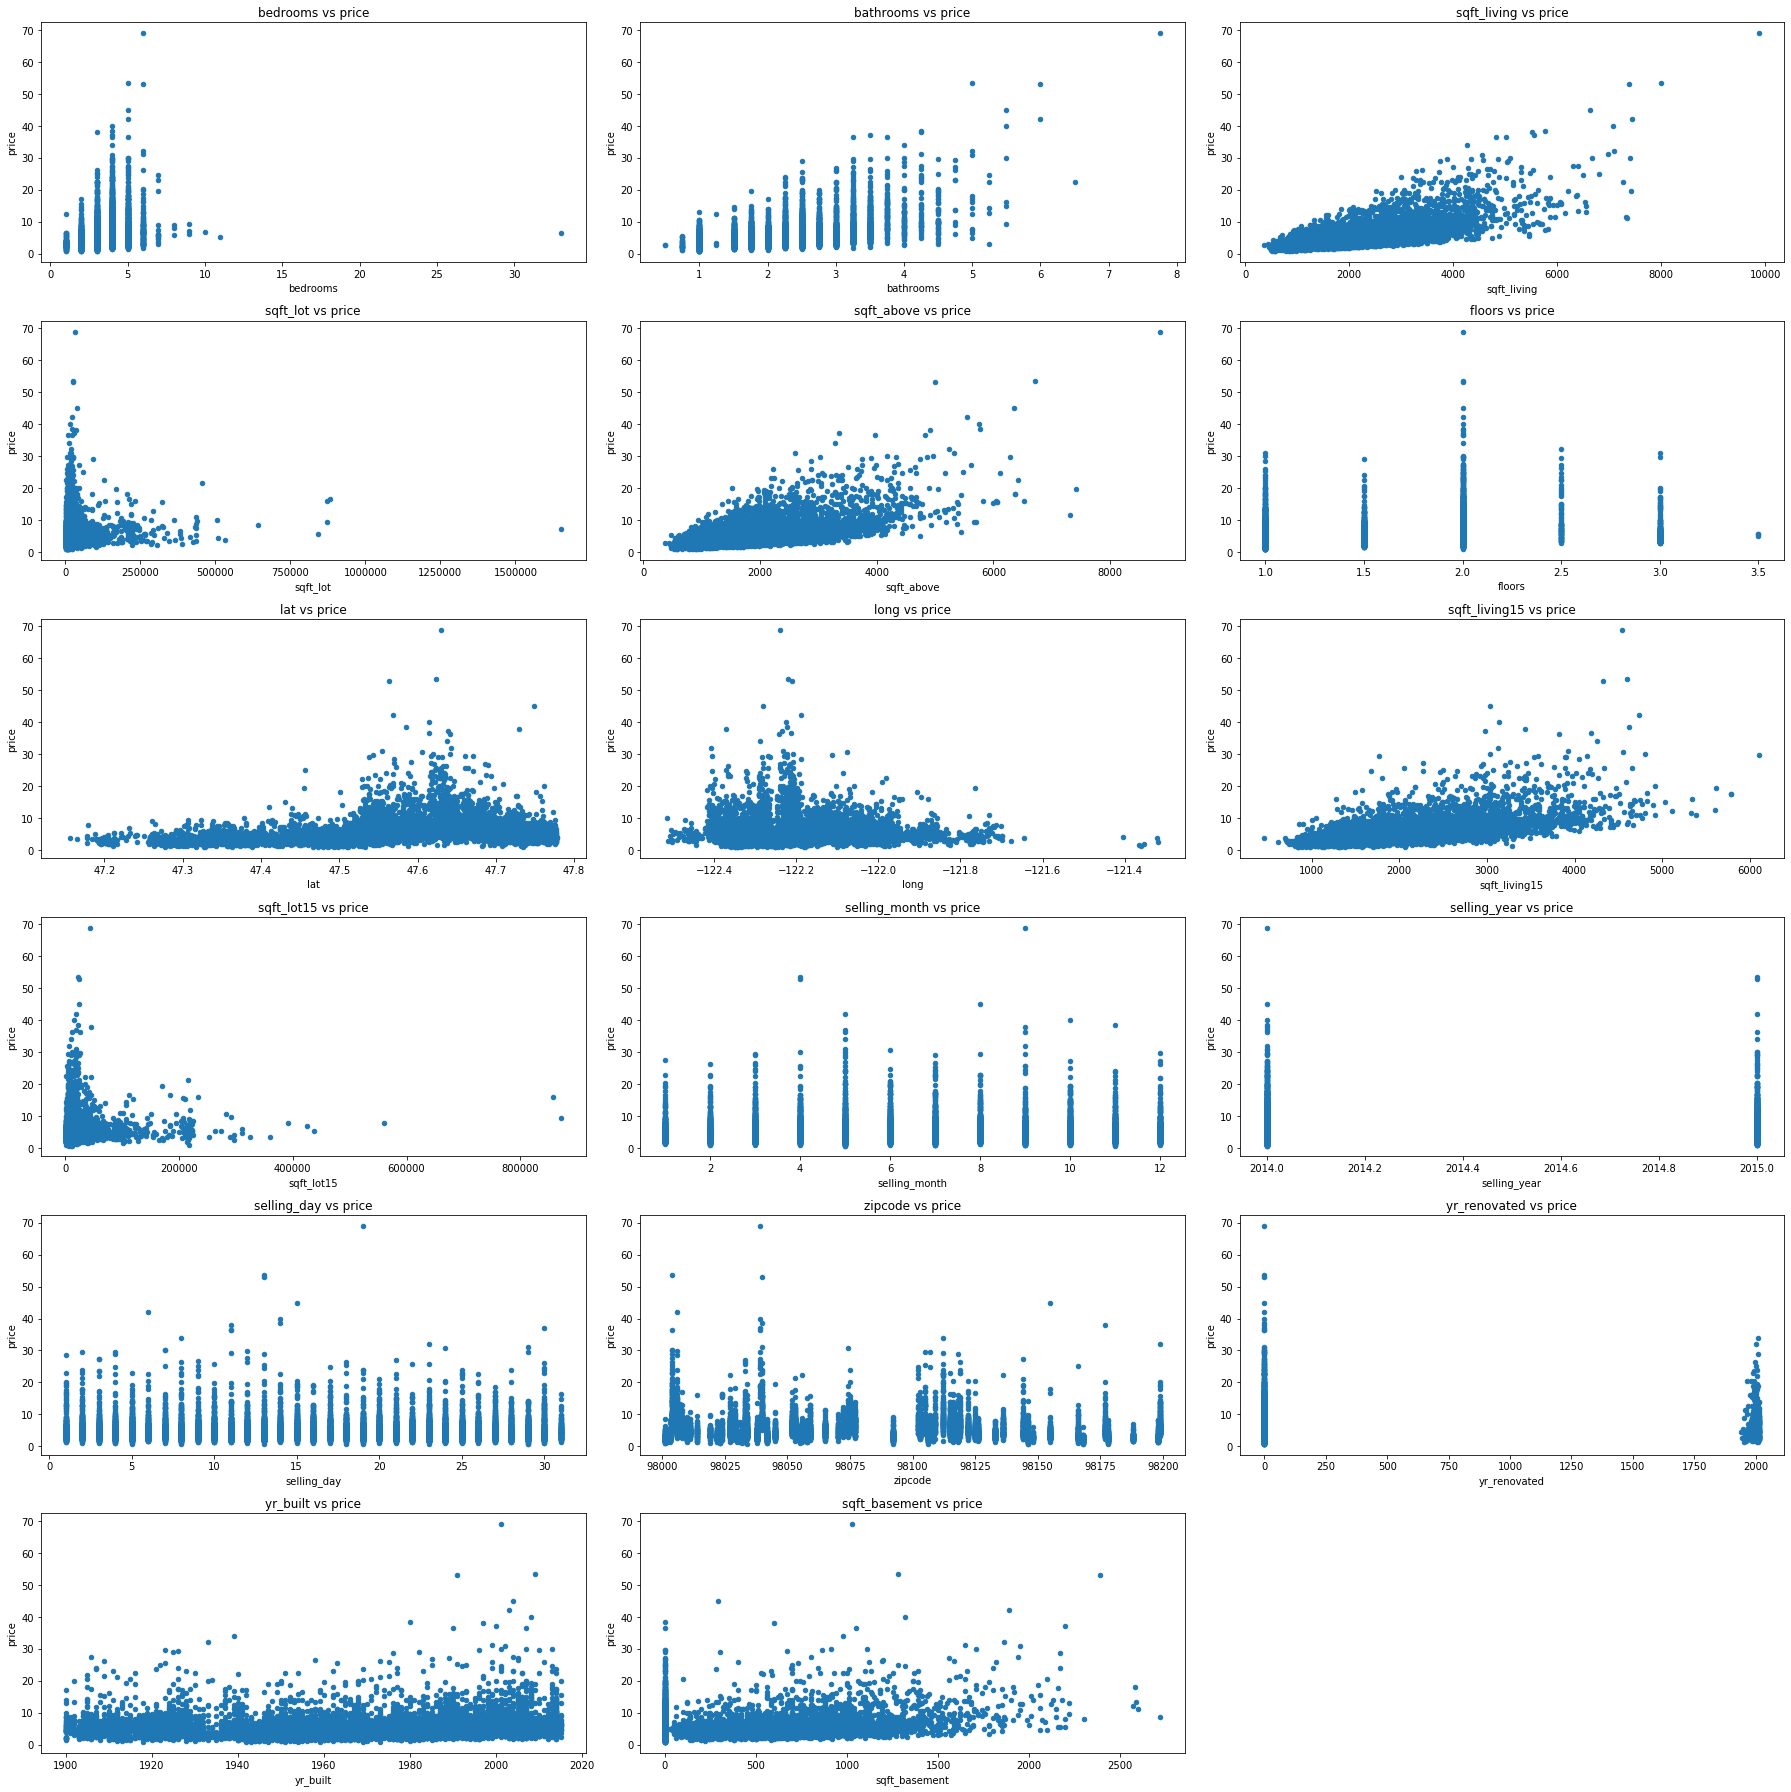

In [622]:
plot_scatter(house_train, numerical_features, 'price', 6, 3)

As we observe the data is hetroscedastic (sqft_living, sqft_lot, sqft_above).


As I mentioned above, converting the output variable to log value should be helpful. So, after taking the log transform of the price, the variation of data looks equal.

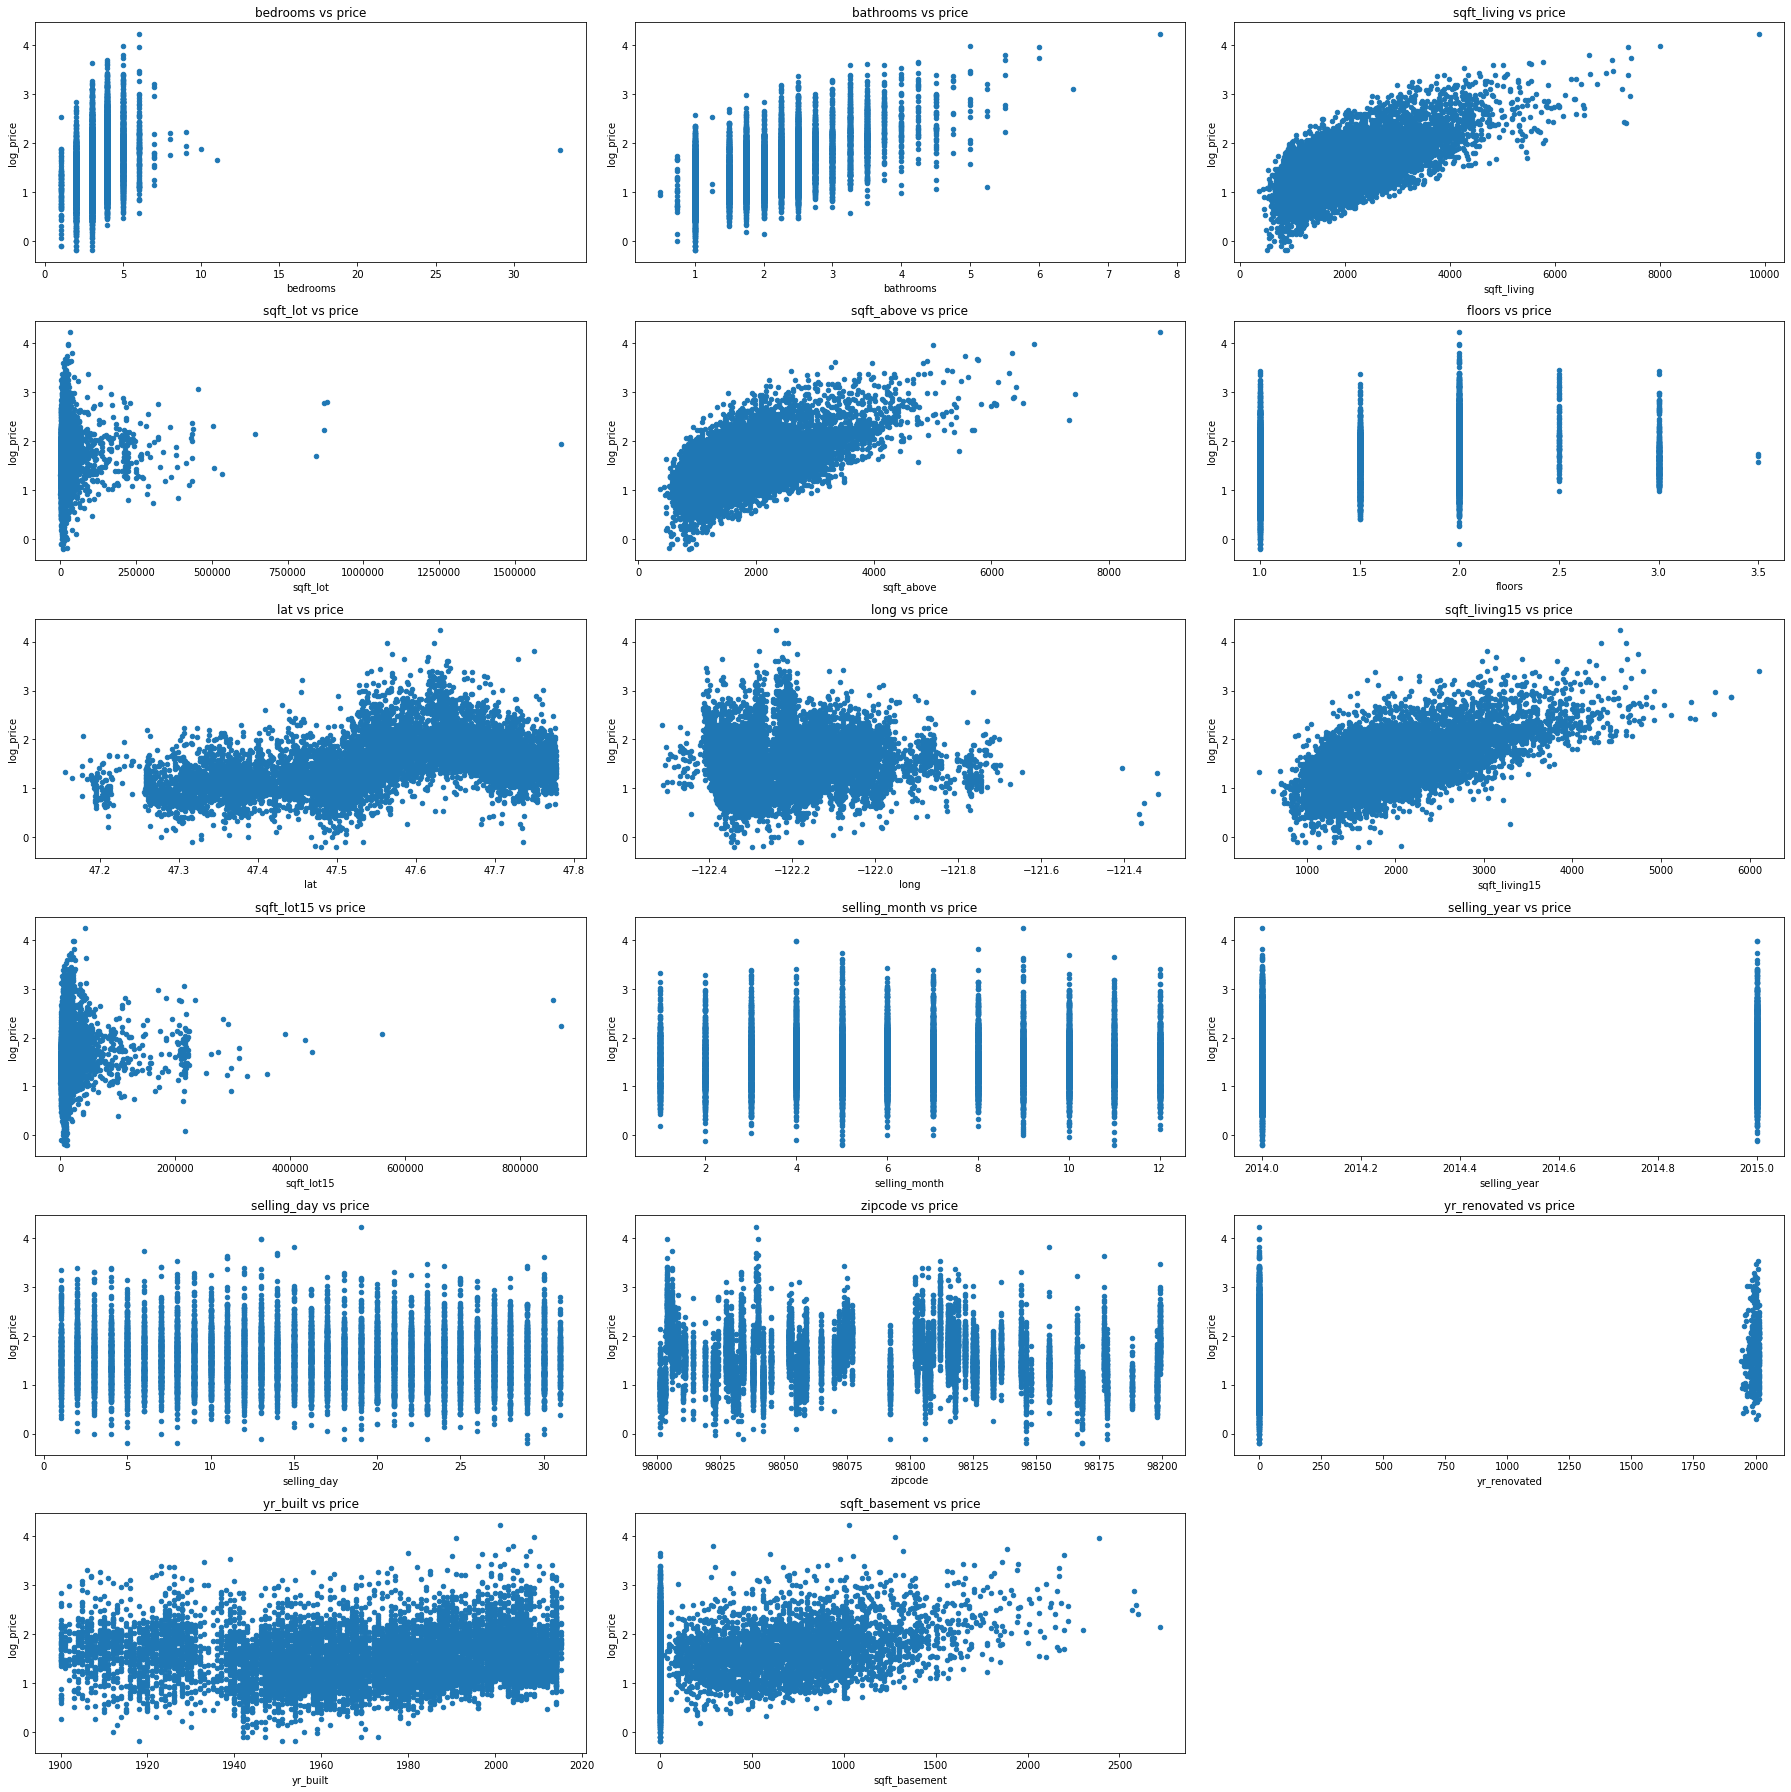

In [626]:
plot_scatter(house_train, numerical_features, 'log_price', 6, 3)

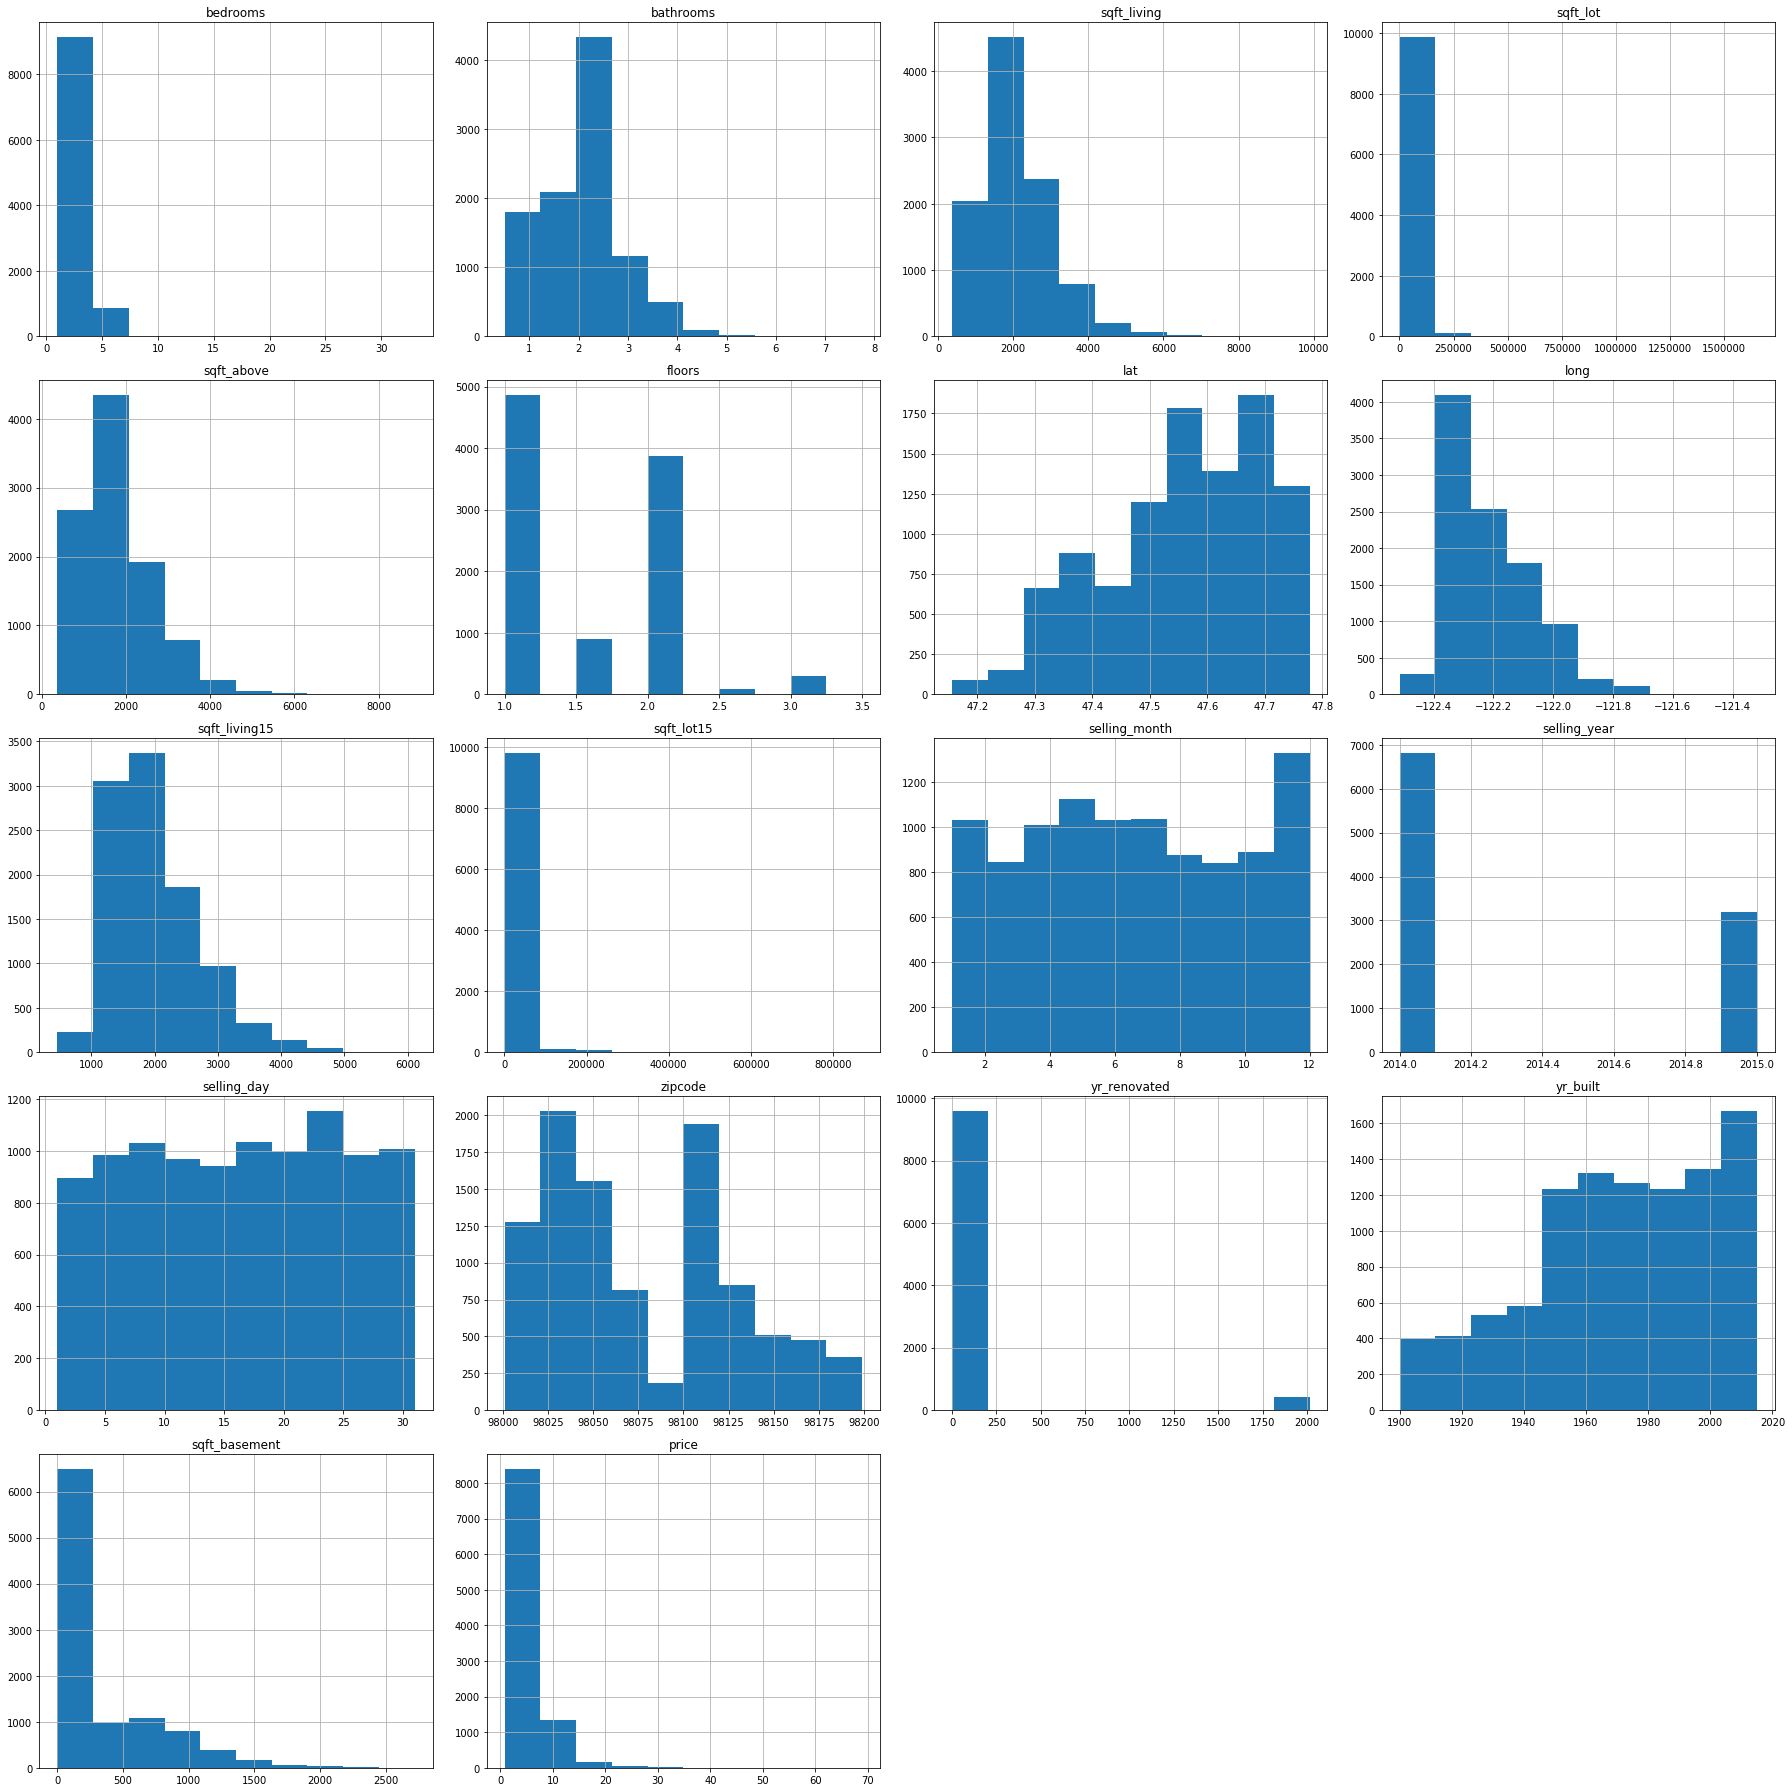

In [627]:
plot_histograms(house_train, numerical_features+['price'], 5, 4)

In [636]:
# Plot the categorical features
def plot_bar(data, variables, yvar, nrows, ncols, figsize):
    fig = plt.figure(figsize=figsize)
    for i, var in enumerate(variables):
        axs = fig.add_subplot(nrows, ncols, i+1)
        data.groupby(var).sum().plot(y=yvar, kind='bar', ax=axs)
        axs.set_title(var+' vs '+yvar)
    plt.tight_layout()
    plt.show()
    
# house_train.groupby('waterfront').sum().plot(y='price', kind='bar')
# house_train.groupby('grade').sum().plot(y='price', kind='bar')
# house_train.groupby('view').sum().plot(y='price', kind='bar')
# house_train.groupby('condition').sum().plot(y='price', kind='bar')

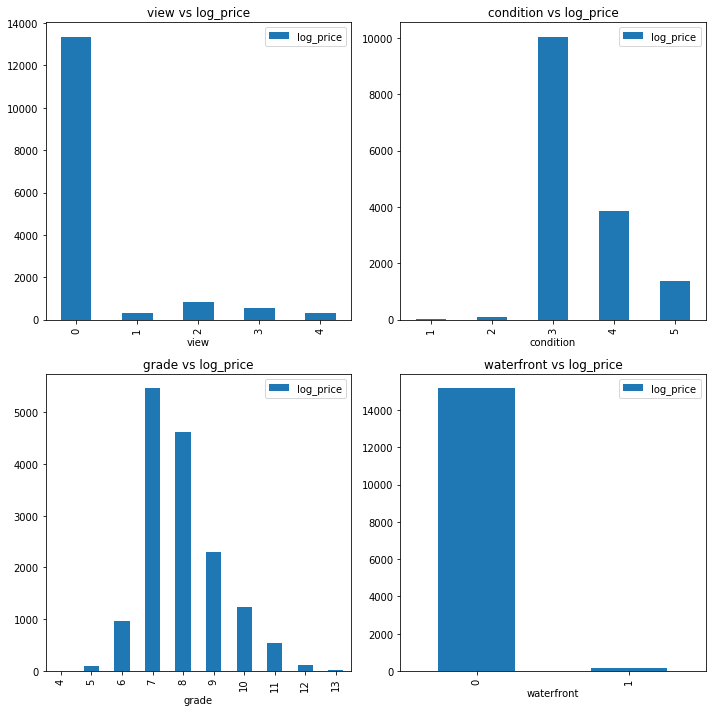

In [639]:
plot_bar(house_train, categorical_features, 'log_price', 2, 2, figsize=(10, 10))

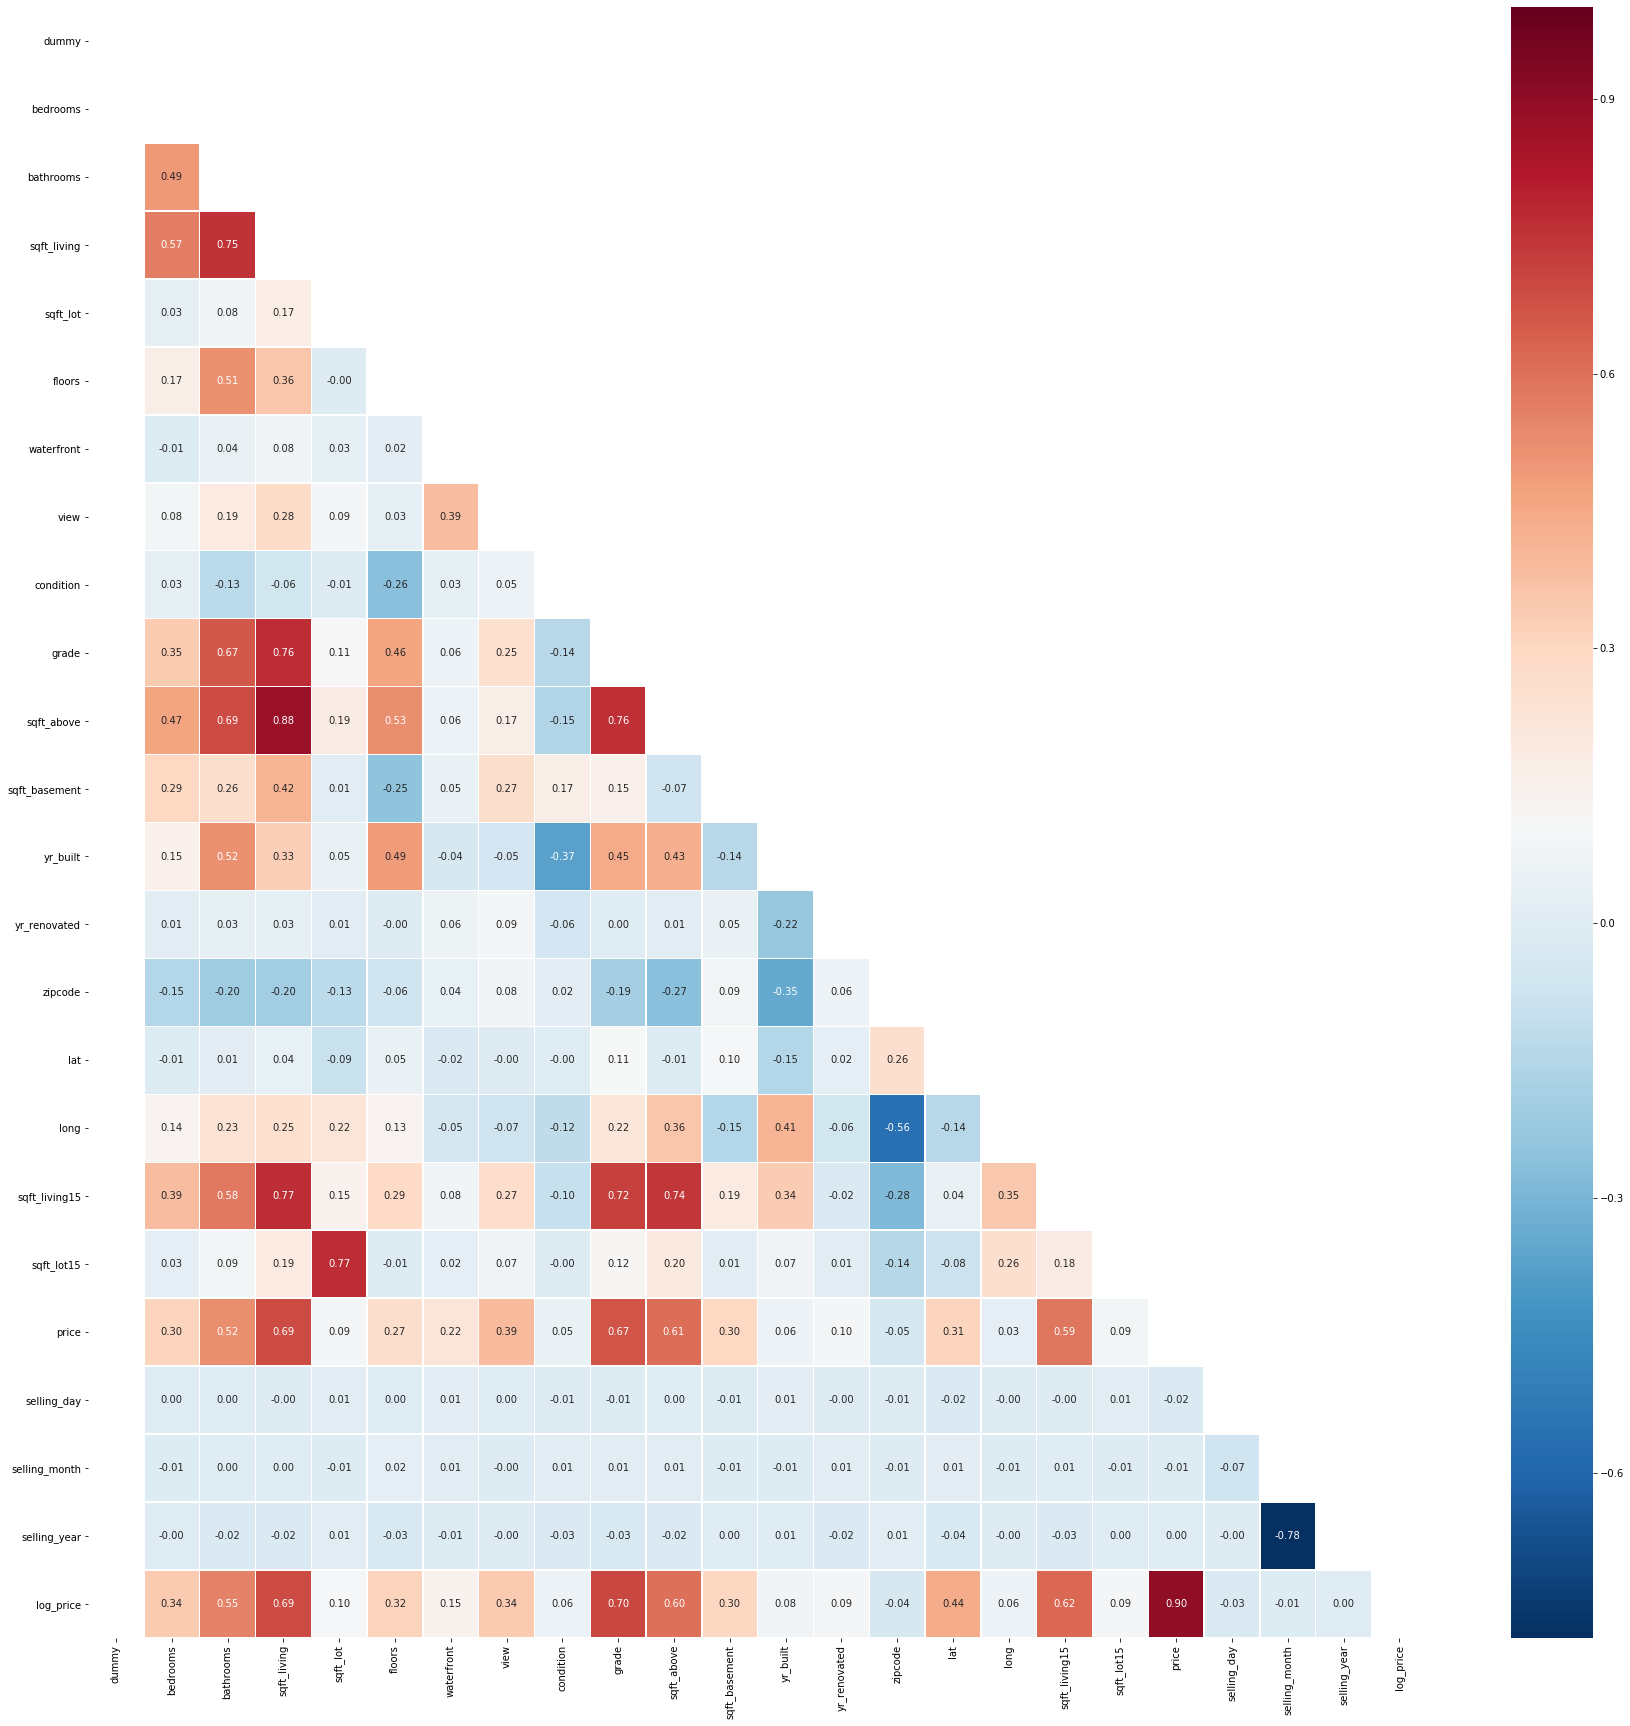

In [643]:
# Plot the correlation between features
corr_mat = house_train[list(all_features)].corr()
fig = plt.figure(figsize=(30, 30))
mask = np.zeros_like(corr_mat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_mat, mask=mask, annot=True, cmap='RdBu_r', linewidths=0.5, fmt='.2f')


# fix the top and bottom cut issue - https://github.com/mwaskom/seaborn/issues/1773
b, t = plt.ylim()
b+=0.5
t-=0.5
plt.ylim(b, t)

plt.show()

### V - Data Preprocessing

1. Split the dataset
2. Apply scaler transform on numerical features on all the data splits
3. Merge the categorical features with numerical transformed features.

In [644]:
# condition does not seem to be correlated linearly with the price, whereas grade is.
# since sqft_living and sqft_living15 are highly correlated with eachother, try dropping one of them.
features = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'lat']

In [685]:
class NormalizeData:
    def __init__(self, dataset):
        self.dataset = dataset
    
    def split_data(self, features, yvar):        
        # split the dataset into X and Y
        # Training dataset
        self.dfX = self.dataset[features]
        self.dfY = self.dataset[yvar]

    def standardScaler(self):
        # standardize the data
        sc = StandardScaler()
        sc.fit(self.dfX)
        return sc
        
    def create_features(self, sc, categorical_features):
        '''
            Tranform the numerical features.
            Concatenate these with the categorical features and dummy features, and return it.
        '''
        X = sc.transform(self.dfX)
        X = np.append(X, self.dataset[categorical_features+['dummy']].values, axis=1)
        Y = self.dfY.values
        return X, Y

In [686]:
# Normalize the training split
p = NormalizeData(house_train)
p.split_data(numerical_features, 'price')
sc=p.standardScaler()
X_train, Y_train = p.create_features(sc, categorical_features)


# Normalize the validation split
p = NormalizeData(house_val)
p.split_data(numerical_features, 'price')
X_val, Y_val = p.create_features(sc, categorical_features)

In [688]:
X_train.shape, X_val.shape

((10000, 22), (5597, 22))

### VI - Training

Run the training loop.
1. Function to shuffle the dataset - required only if you're using min-batch or staochastic gradient descent
2. Gradient descent step - One step of gradient descent (runs on the entire dataset in this case, batch gradient descent)
3. Gradient descent - Entire gradient descent procedure
4. Helper functions - calculate predictions, calculate cost

In [763]:

def shuffle_dataset(X, Y):
    perm = np.random.permutation(len(Y))
    return X[perm], Y[perm]

def prediction(X, W):
    return X.dot(W)

def calc_cost(error, W, reg_lambda, m):
    sq_error = 1/2 * (np.sum(np.square(error)) + reg_lambda * np.sum(np.square(W))) 
    return sq_error

def gradient_descent_step(X, Y, Xval, Yval, W, m, n, lr, reg_lambda):
    '''
    Single step of gradient descent
     w (21, 1) * X (10000, 21) = Y (10000, 1)
     # intercept is included
    '''
    # shuffle the train dataset
    X_shuffled, Y_shuffled = X, Y

    # prediction
    Y_pred = prediction(X_shuffled, W) # O(n*m)
    Yval_pred = prediction(Xval, W)

    # calculate the error
    error = np.subtract(Y_pred, Y) # O(n)
    error_val = np.subtract(Yval_pred, Yval)

    # update the weights
    # W = W - lambda * delta - regularization_alpha * norm(W)
    Wdelta =  np.dot(X.T, error) # O(n*m)
    Wdelta += np.abs(W) * reg_lambda # O(m)
    W = np.subtract(W, (1/n)*lr*Wdelta) 


    # calculate the cost
    cost = calc_cost(error, W, reg_lambda, m) #O(m^2)
    cost_val = calc_cost(error_val, W, reg_lambda, m)

    return W, cost, cost_val


def gradient_descent(X, Y, Xval, Yval, err_threshold, lr=0.01, reg_lambda=0, max_epochs=1000):
    '''
    Gradient Descent Procedure.
    arguments:
    :X - training examples
    :Y - predictions
    :err_threshold - Threshold of error
    :lr - learning rate
    '''
    X_examples, n_features = X_train.shape
    W = np.random.uniform(0, 1, n_features)
    prev_error = float('inf')
    epoch = 0
    error_hist={'train': [], 'val': []}

    while prev_error>err_threshold and epoch<max_epochs:
        W, error, error_val = gradient_descent_step(X, Y, Xval, Yval, W, n_features, X_examples, lr, reg_lambda)
        if np.isnan(W).any() or np.isinf(W).any() or np.isnan(error) or np.isinf(error) or np.isnan(error_val) or np.isinf(error_val):
            break
        epoch+=1

        if error>prev_error+0.01:
            print("Previous error: {}, error: {}".format(prev_error, error))
            break

        # save the errors in error_hist
        error_hist['train'].append(error) 
        error_hist['val'].append(error_val)

#         if epoch%1000==0:
#             print("Epoch: {}, loss: {}, validation loss: {}".format(epoch, error, error_val))

        prev_error = error

    print("Epoch: {}, Final loss: {}, Final validation loss: {}".format(epoch, error, error_val))
    return W, error_hist

# Plot the cost curve
def plot_loss(cost_hist, lr, reg_lambda):
    fig = plt.figure()
    n = len(cost_hist['train'])
    X = list(range(n))
    plt.plot(X, cost_hist['train'], label='Training data')
    plt.plot(X, cost_hist['val'], label='Validation data')
    plt.title("Cost function for learning rate: {} and regularization lambda: {}".format(lr, reg_lambda))
    plt.legend()
    plt.show()
    
    
def calculate_regression_score(W, X, Y):
    # calculate prediction
    y_pred = prediction(X, W)
    # sum of squared error
    sse = np.sum(np.square(y_pred-Y))
    # sum of squared total
    sst = np.sum(np.square(Y-Y.mean()))
    # adjusted r-squared
    rSquared = 1 - (sse / sst)    
    n, p = X.shape
    adjrSquared = 1 - ((1-rSquared)*(n-1)/(n-p-1))
    
    return rSquared, adjrSquared

Epoch: 15000, Final loss: 20165.5188904702, Final validation loss: 11109.678241981723


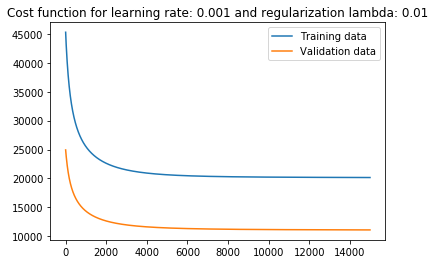

In [734]:
# hyperparameters 
lr = 0.001
err_threshold = 1
reg_lambda = .01
max_epochs = 15000

W, error_hist = gradient_descent(X_train, Y_train, X_val, Y_val, err_threshold, lr, reg_lambda, max_epochs)
plot_loss(error_hist, lr, reg_lambda)

### Parameter search

Previous error: 68297.06408146786, error: 3146008034.1591716
Epoch: 2, Final loss: 3146008034.1591716, Final validation loss: 2333284824.8804674


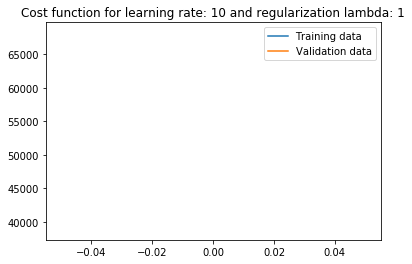

Previous error: 116564.54592276023, error: 33694588723.07803
Epoch: 2, Final loss: 33694588723.07803, Final validation loss: 19719365373.12657


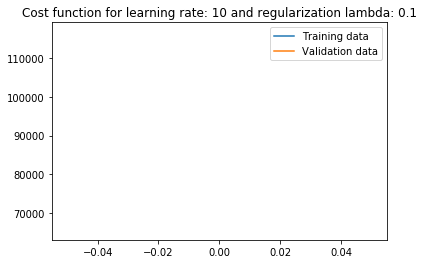

Previous error: 98698.62579818639, error: 19424355571.948597
Epoch: 2, Final loss: 19424355571.948597, Final validation loss: 10875664209.58408


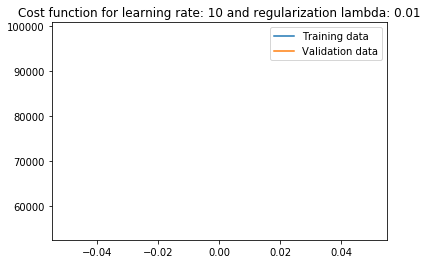

Previous error: 67337.10197745633, error: 94151446.44846506
Epoch: 2, Final loss: 94151446.44846506, Final validation loss: 52640454.682334945


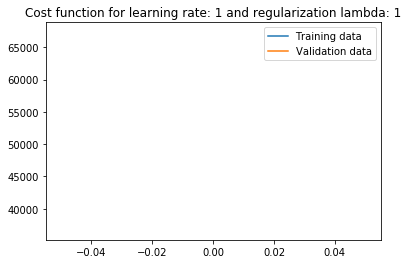

Previous error: 55196.30338059336, error: 5252361.86813991
Epoch: 2, Final loss: 5252361.86813991, Final validation loss: 2929986.6141508077


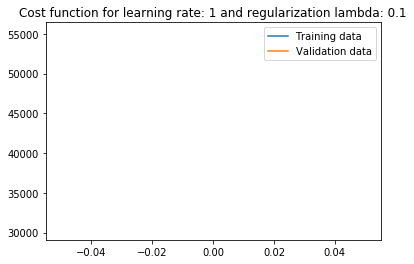

Previous error: 73608.77964122771, error: 117512346.5916126
Epoch: 2, Final loss: 117512346.5916126, Final validation loss: 65348296.4194288


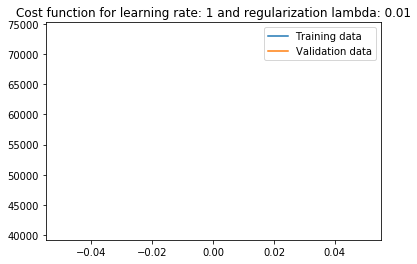

Previous error: 41813.9282277332, error: 82790.00309790656
Epoch: 2, Final loss: 82790.00309790656, Final validation loss: 47118.34726428437


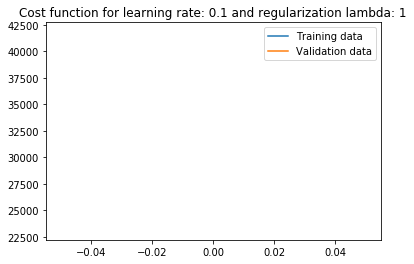

Previous error: 58538.86366592604, error: 280906.061677123
Epoch: 2, Final loss: 280906.061677123, Final validation loss: 154193.38183428434


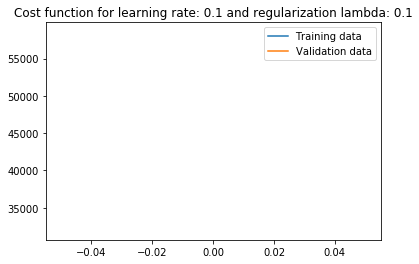

Previous error: 157677.45283208715, error: 4247419.239696629
Epoch: 2, Final loss: 4247419.239696629, Final validation loss: 2366212.9194309856


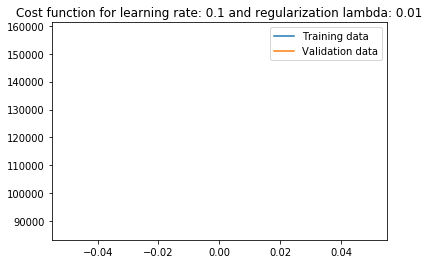

Epoch: 15000, Final loss: 19672.028203350674, Final validation loss: 10769.399379661372


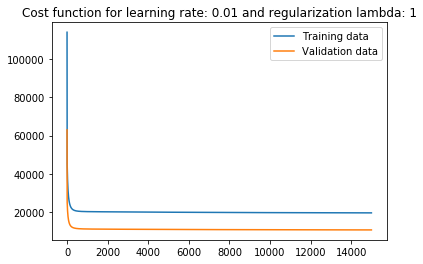

Epoch: 15000, Final loss: 19667.862329585394, Final validation loss: 10759.46233630828


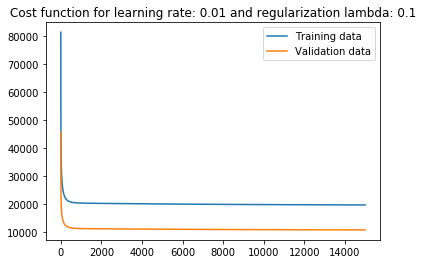

Epoch: 15000, Final loss: 19662.867040783607, Final validation loss: 10749.764083211723


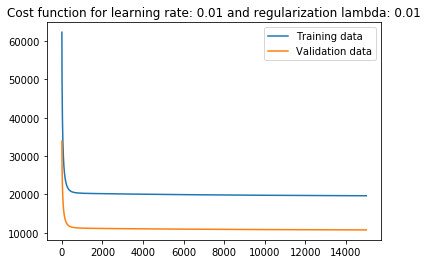

Epoch: 15000, Final loss: 20237.817525650717, Final validation loss: 11157.820603210037


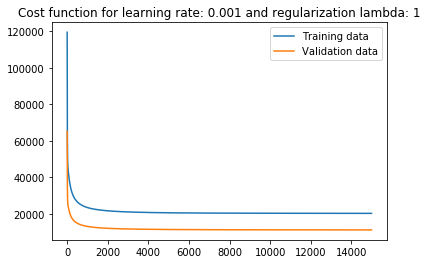

Epoch: 15000, Final loss: 20137.8244437679, Final validation loss: 11086.353854573987


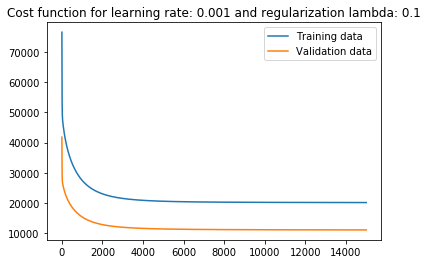

Epoch: 15000, Final loss: 20396.772729219632, Final validation loss: 11253.469675823413


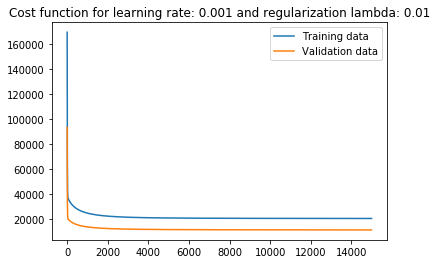

Epoch: 15000, Final loss: 23711.91981173024, Final validation loss: 13037.254783681936


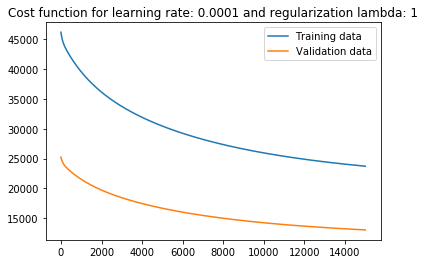

Epoch: 15000, Final loss: 24382.301084070456, Final validation loss: 13606.941107116061


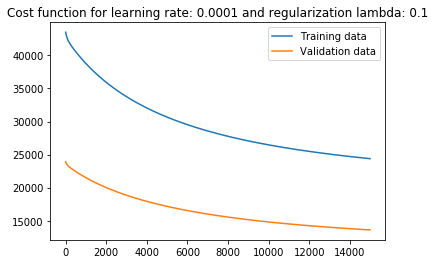

Epoch: 15000, Final loss: 24751.456745320666, Final validation loss: 13883.359773602502


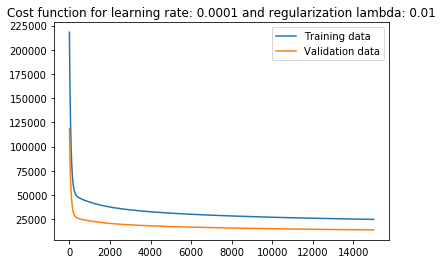

Epoch: 15000, Final loss: 34233.85532947584, Final validation loss: 19188.4955469115


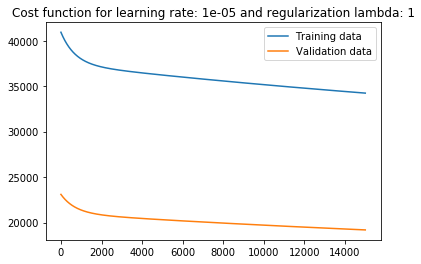

Epoch: 15000, Final loss: 33947.827155637104, Final validation loss: 18932.74083301532


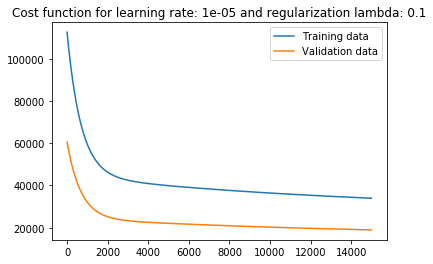

Epoch: 15000, Final loss: 38551.84389714419, Final validation loss: 21268.653635054907


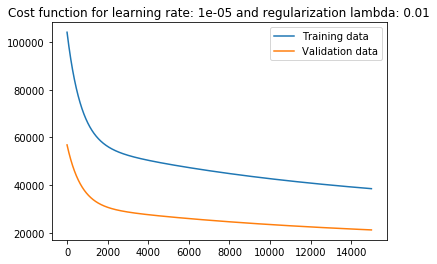

In [715]:
# Parameter search

# hyperparameters 
lr_search = [10,1,0.1,0.01,0.001,1e-4,1e-5]
err_threshold = 1
reg_lambdas = [1,1e-1,1e-2]
max_epochs = 15000
W_hist = {'params': [], 'weights': []} 

for lr in lr_search:
    for reg_lambda in reg_lambdas:
        W, error_hist = gradient_descent(X_train, Y_train, X_val, Y_val, err_threshold, lr, reg_lambda, max_epochs)
        W_hist['params'].append((lr, reg_lambda))
        W_hist['weights'].append(W)
        plot_loss(error_hist, lr, reg_lambda)

In [761]:
# select model and calculate weights
# lr = 0.01 and reg. lambda = 0.01
print(W_hist['params'][11])
W = W_hist['weights'][11]

(0.01, 0.01)


In [762]:
rSquared, adjrSquared = calculate_regression_score(W, X_val, Y_val)
print("R-squared: {:.3f}, Adjusted R-squared: {:.3f}".format(rSquared, adjrSquared))

R-squared: 0.697, Adjusted R-squared: 0.696


In [760]:
# calculate r-squared using sklearn
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.01)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_val)
print("R-squared: {:.3f}".format(model.score(X_val, Y_val)))

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

### Using log transformed price as the predictor variable

In [767]:
# features = ['bedrooms','bathrooms','sqft_living', 'floors','waterfront','view','condition','grade', 'sqft_basement', 'yr_built', 'syear', 'lat','long']

# dfX_train = house_train[features]
# dfX_val = house_val[features]

Y_train = house_train['log_price'].values
Y_val = house_val['log_price'].values

array([1.68268837, 1.62924054, 1.89085037, ..., 1.80941109, 1.55814462,
       1.39153311])

As we observe R-squared score increased from 0.698 to 0.772

Epoch: 15000, Final loss: 312.8237880254752, Final validation loss: 175.80071217456157


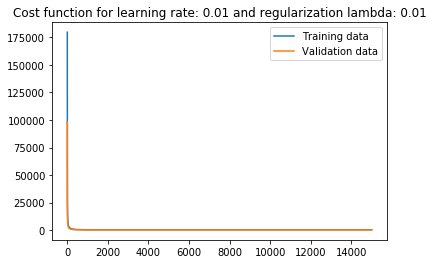

R-squared: 0.772, Adjusted R-squared: 0.772


In [768]:
# hyperparameters 
lr = 0.01
err_threshold = 1
reg_lambda = 0.01
max_epochs = 15000

W, error_hist = gradient_descent(X_train, Y_train, X_val, Y_val, err_threshold, lr, reg_lambda, max_epochs)
plot_loss(error_hist, lr, reg_lambda)
rSquared, adjrSquared = calculate_regression_score(W, X_val, Y_val)
print("R-squared: {:.3f}, Adjusted R-squared: {:.3f}".format(rSquared, adjrSquared))

### After choosing the features

In [807]:
# features = ['bedrooms','bathrooms','sqft_living', 'floors','waterfront','view','condition','grade', 'sqft_basement', 'yr_built', 'syear', 'lat','long']
numerical_features_reduced = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'selling_year', 'zipcode', 'lat','long']
categorical_features_reduced = ['waterfront', 'view', 'grade']

# Normalize the training split
p = NormalizeData(house_train)
p.split_data(numerical_features_reduced, 'log_price')
sc=p.standardScaler()
X_train, Y_train = p.create_features(sc, categorical_features_reduced)

# Normalize the validation split
p = NormalizeData(house_val)
p.split_data(numerical_features_reduced, 'log_price')
X_val, Y_val = p.create_features(sc, categorical_features_reduced)

Epoch: 15000, Final loss: 329.19719427895484, Final validation loss: 183.5625381946533


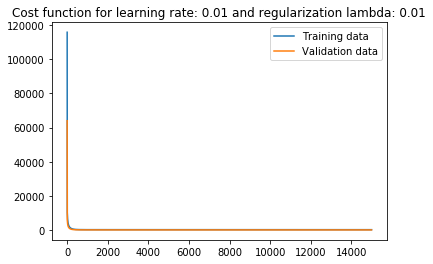

R-squared: 0.762, Adjusted R-squared: 0.762


In [808]:
# hyperparameters 
lr = 0.01
err_threshold = 1
reg_lambda = 0.01
max_epochs = 15000

W, error_hist = gradient_descent(X_train, Y_train, X_val, Y_val, err_threshold, lr, reg_lambda, max_epochs)
plot_loss(error_hist, lr, reg_lambda)
rSquared, adjrSquared = calculate_regression_score(W, X_val, Y_val)
print("R-squared: {:.3f}, Adjusted R-squared: {:.3f}".format(rSquared, adjrSquared))